### Lushan Map
Code to produce Area around the Lushan Earthquake and corresponding gravity stations

In [45]:
# imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cartopy
import pandas as pd
import cartopy.io.img_tiles as cimgt
import matplotlib.ticker as mticker

In [2]:
df = pd.read_csv('gravitystations.txt', sep='\t')

# Display the DataFrame
df.describe()

,10104600,lat,long,329.8
count,3.700000e+02,370.000000,370.000000,370.000000
mean,5.001343e+07,29.665595,102.257324,2044.340541
std,1.694849e+07,1.866088,1.311890,1154.001056
min,1.010460e+07,26.210000,99.800000,51.900000
25%,5.100762e+07,27.947500,101.410000,1101.525000
50%,5.103035e+07,29.870000,102.210000,1933.050000
75%,5.103778e+07,31.182500,102.992500,3068.975000
max,9.112930e+07,34.090000,105.940000,4465.200000


In [3]:
lat_min = 26.0
lat_max = 32.0
lon_min = 100.0
lon_max = 105.0

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

df = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) &
                 (df['long'] >= lon_min) & (df['long'] <= lon_max)]

df.describe()


,10104600,lat,long,329.8
count,3.340000e+02,334.000000,334.000000,334.000000
mean,5.038954e+07,29.360269,102.055569,2065.433533
std,1.309448e+07,1.642524,1.125572,1147.739893
min,1.010590e+07,26.210000,100.020000,51.900000
25%,5.100832e+07,27.890000,101.310000,1155.400000
50%,5.103075e+07,29.500000,102.170000,1933.050000
75%,5.103738e+07,30.805000,102.760000,3071.275000
max,9.112930e+07,31.980000,104.780000,4465.200000


In [4]:
stations_df = pd.read_csv('absgravitystations.txt', sep=' ')

stations_df.head()

,name,lat,long,num
0,xichang,27.91,102.23,1579.6
1,panzhihua,26.50,101.74,1174.6
2,pixian,30.91,103.76,616.7


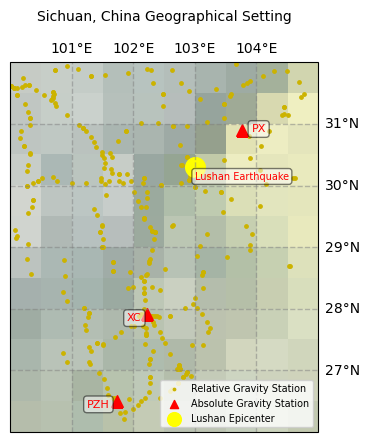

In [108]:
proj = ccrs.PlateCarree()

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_title('Sichuan, China Geographical Setting', fontsize=10, pad=15)

extent = [100, 105, 26, 32]
ax.set_extent(extent)

grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

ax.scatter(df['long'], df['lat'], color=(.8, .7, 0), marker='o', s=6, transform=ccrs.PlateCarree(), label="Relative Gravity Station")
ax.scatter(stations_df['long'], stations_df['lat'], color='red', marker='^', s=70, transform=ccrs.PlateCarree(), label="Absolute Gravity Station")
ax.scatter(103.0, 30.3, color='yellow', marker='o', s=200, label="Lushan Epicenter")

ax.text(103, 30.1, "Lushan Earthquake", fontsize=7, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(103.92, 30.87, "PX", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.9, 27.8, "XC", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.25, 26.4, "PZH", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))

plt.legend(loc="lower right", fontsize="x-small", markerscale=.7)
plt.show()